<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/Regression_Investments_and_Energy_Capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Draw graphs "inline" in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
#Make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving Dataset QM2 Coursework.xlsx to Dataset QM2 Coursework.xlsx


In [4]:
import pandas as pd

#Name of uploaded file
file_name = 'Dataset QM2 Coursework.xlsx'

#Read data from the two sheets
sheet1_df = pd.read_excel(file_name, sheet_name='BRI investments')
sheet2_df = pd.read_excel(file_name, sheet_name='total energy capacity added ')

#Print data from both sheets
print("Data from Sheet1:")
print(sheet1_df.head())

print("Data from Sheet2:")
print(sheet2_df.head())

Data from Sheet1:
   Year BRI Investments in Energy Sector (USD millions)
0  2011                                             880
1  2012                                             200
2  2013                                               -
3  2014                                             250
4  2015                                            3610
Data from Sheet2:
   Year Total Energy Capacity Added From completed CPEC Projects (MW)
0  2015                                                  -           
1  2016                                                400           
2  2017                                               1370           
3  2018                                               1420           
4  2019                                               1980           


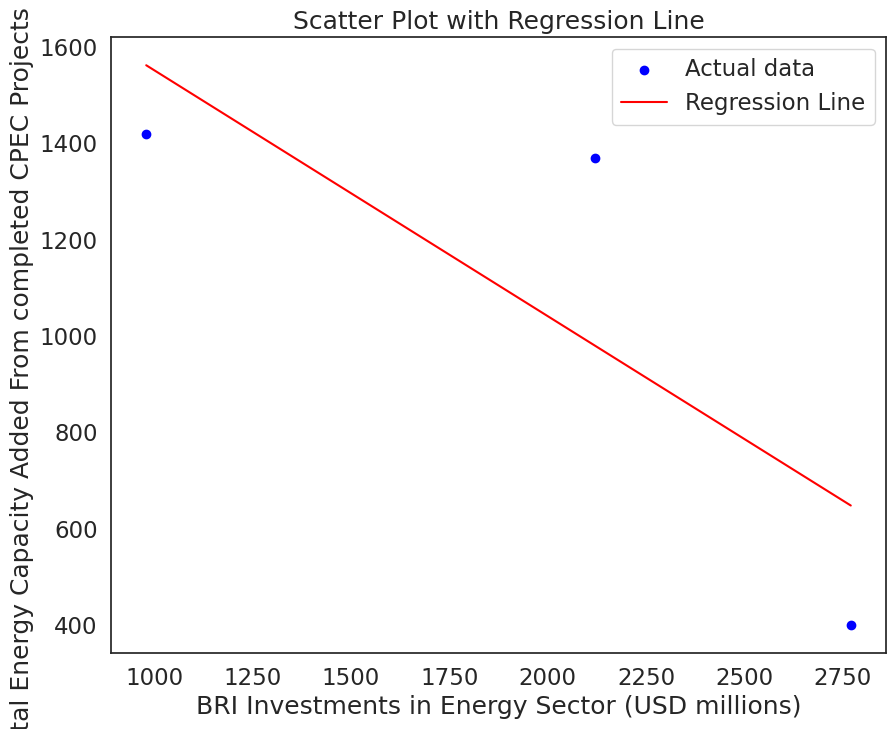

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#Merge the two DataFrames based on the 'Year' column
data = pd.merge(sheet1_df, sheet2_df, on='Year')

#Replace hyphens with NaN in the relevant columns
data['BRI Investments in Energy Sector (USD millions)'] = pd.to_numeric(data['BRI Investments in Energy Sector (USD millions)'], errors='coerce')
data['Total Energy Capacity Added From completed CPEC Projects (MW)'] = pd.to_numeric(data['Total Energy Capacity Added From completed CPEC Projects (MW)'], errors='coerce')

#Select features (X) and target (y)
X = data[['BRI Investments in Energy Sector (USD millions)']]
y = data['Total Energy Capacity Added From completed CPEC Projects (MW)']

#Remove rows with NaN values in either X or y
data_cleaned = data.dropna(subset=['BRI Investments in Energy Sector (USD millions)', 'Total Energy Capacity Added From completed CPEC Projects (MW)'])
X_cleaned = data_cleaned[['BRI Investments in Energy Sector (USD millions)']]
y_cleaned = data_cleaned['Total Energy Capacity Added From completed CPEC Projects (MW)']

#Perform Linear Regression
model = LinearRegression()
model.fit(X_cleaned, y_cleaned)

#Predict values using the regression model
y_pred = model.predict(X_cleaned)

#Create the scatter plot
plt.scatter(X_cleaned, y_cleaned, color='blue', label='Actual data')

#Plot the regression line
plt.plot(X_cleaned, y_pred, color='red', label='Regression Line')

#Add labels and title
plt.xlabel('BRI Investments in Energy Sector (USD millions)')
plt.ylabel('Total Energy Capacity Added From completed CPEC Projects (MW)')
plt.title('Scatter Plot with Regression Line')
plt.legend()

#Show the plot
plt.show()

In [15]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

#Fit the model
model= ols('BRI Investments in Energy Sector (USD millions) ~ Total Energy Capacity Added From completed CPEC Projects (MW)', data=data).fit()

#Print the summary
print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

Text(69.75, 0.5, 'Total Energy Capacity Added From completed CPEC Projects (MW)')

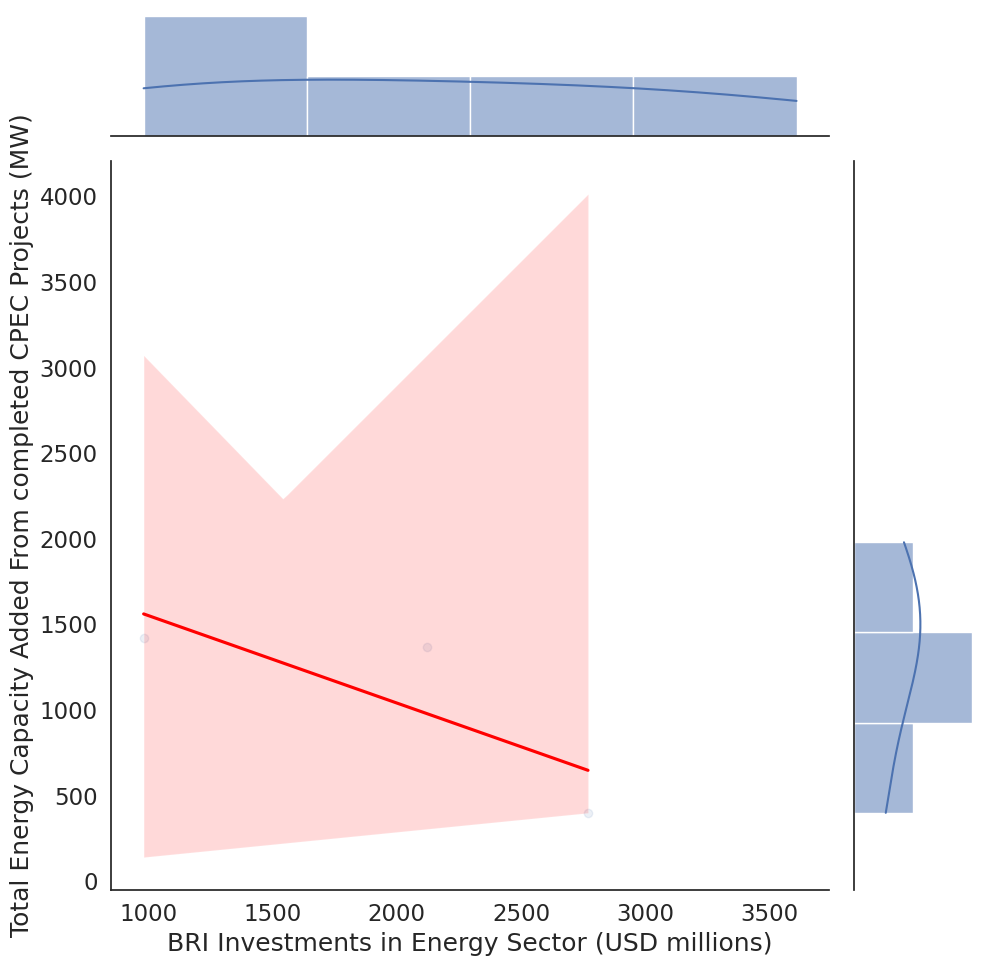

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Merge the two DataFrames based on the 'Year' column
data = pd.merge(sheet1_df, sheet2_df, on='Year')

# Replace hyphens with NaN in the relevant columns
data['BRI Investments in Energy Sector (USD millions)'] = pd.to_numeric(data['BRI Investments in Energy Sector (USD millions)'], errors='coerce')
data['Total Energy Capacity Added From completed CPEC Projects (MW)'] = pd.to_numeric(data['Total Energy Capacity Added From completed CPEC Projects (MW)'], errors='coerce')

#Plot scatterplot and two histograms
sns.jointplot(data=data,
              x='BRI Investments in Energy Sector (USD millions)',
              y='Total Energy Capacity Added From completed CPEC Projects (MW)',
              kind="reg",
              scatter_kws=dict(alpha=0.1),
              line_kws=dict(color='red'),
              height=10)

#Add labels to the axes
plt.xlabel('BRI Investments in Energy Sector (USD millions)')
plt.ylabel('Total Energy Capacity Added From completed CPEC Projects (MW)')

SyntaxError: invalid syntax (<unknown>, line 1)

   Year Total Energy Capacity Added From completed CPEC Projects (MW)
0  2015                                                  -           
1  2016                                                400           
2  2017                                               1370           
3  2018                                               1420           
4  2019                                               1980           
5  2020                                                  -           
6  2021                                               4000           
7  2022                                               1050           
